In [202]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load model

In [203]:
# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Load data clean

In [204]:
# Load the CSV file into a DataFrame
df_de = pd.read_csv('../Preprocessing/data_clean/de_clean_1.csv')
df_en = pd.read_csv('../Preprocessing/data_clean/en_clean_1.csv')
df_es = pd.read_csv('../Preprocessing/data_clean/es_clean_1.csv')


### DE fix

In [205]:
#for DE datasate drop empty lines
df_de = df_de.dropna(subset=['data'])


### Hincapié fix

In [206]:
# Replace 'Piero Hincapié' with 'Piero Hincapie' in the 'player' column
df_es['player'] = df_es['player'].replace('piero hincapié', 'piero hincapie')
df_en['player'] = df_en['player'].replace('piero hincapié', 'piero hincapie')


# Sentiment Analysis

In [207]:
def sentiment_score(data):
    if isinstance(data, str):
        tokens = tokenizer.encode(data, return_tensors='pt')
        result = model(tokens)
        return int(torch.argmax(result.logits)) + 1
    else:
        return 0

In [208]:
df_de['sentiment'] = df_de['data'].apply(lambda x: sentiment_score(x[:512]))
df_en['sentiment'] = df_en['data'].apply(lambda x: sentiment_score(x[:512]))
df_es['sentiment'] = df_es['data'].apply(lambda x: sentiment_score(x[:512]))

In [209]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de = df_de.groupby('player')['sentiment'].mean()
mean_sentiment_en = df_en.groupby('player')['sentiment'].mean()
mean_sentiment_es = df_es.groupby('player')['sentiment'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de)
print('Sentiment score per player EN')
print(mean_sentiment_en)
print('Sentiment score per player ES')
print(mean_sentiment_es)

Sentiment score per player DE
player
exequiel palacios    3.154639
jeremie frimpong     3.153846
jonathan tah         3.123596
mitchel bakker       3.206186
moussa diaby         3.016393
mykhaylo mudryk      2.105263
piero hincapie       2.682353
Name: sentiment, dtype: float64
Sentiment score per player EN
player
exequiel palacios    2.714286
jeremie frimpong     2.941748
jonathan tah         3.000000
mitchel bakker       3.181818
moussa diaby         2.924138
mykhaylo mudryk      2.666667
piero hincapie       2.607143
Name: sentiment, dtype: float64
Sentiment score per player ES
player
exequiel palacios    2.886598
jeremie frimpong     3.173913
jonathan tah         2.666667
mitchel bakker       2.545455
moussa diaby         2.903226
mykhaylo mudryk      2.444444
piero hincapie       3.192308
Name: sentiment, dtype: float64


# Player sentence analysis

In [210]:
def extract_sentence(df):
    df['short'] = ''
    
    for index, row in df.iterrows():
        player = row['player']
        data = str(row['data'])  # Convert data to string
        
        # Find the sentence containing player's information
        sentences = data.split('.')
        for sentence in sentences:
            if player.lower() in sentence.lower():
                df.at[index, 'short'] = sentence.strip()
                break
    
    return df

In [211]:
extract_sentence(df_de)
extract_sentence(df_en)
extract_sentence(df_es)

,data,player,language,publishedAt,sentiment,short
0,adeyemi firmo el que es su primer gol en lo qu...,exequiel palacios,es,2023-01-29T18:25:03Z,1,\n con florian wirtz dejando su lesion definit...
1,la ultima semana de marzo es la primera ventan...,exequiel palacios,es,2023-01-30T16:52:46Z,2,
2,gustavo puerta ya no jugara en el bayer leverk...,exequiel palacios,es,2023-01-31T20:41:38Z,1,"el club aleman, que siempre se ha caracterizad..."
3,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-09T18:32:38Z,5,"\n el presidente de la afa, claudio \'chiqui\'..."
4,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-12T21:13:55Z,2,\n tambien participaron los otros campeones de...
...,...,...,...,...,...,...
268,"antes del minuto, el visitante ya habia llegad...",piero hincapie,es,2023-05-11T21:13:48Z,1,"antes del minuto, el visitante ya habia llegad..."
269,el bayer leverkusen jugo de visita contra la r...,piero hincapie,es,2023-05-11T20:56:21Z,3,"el elenco aleman, del zaguero ecuatoriano pier..."
270,un ecuatoriano volvera a semifinales de un tor...,piero hincapie,es,2023-05-11T18:30:25Z,4,"esta vez, piero hincapie estara en esta instan..."
271,la seleccion de ecuador jugara sus dos ultimos...,piero hincapie,es,2023-05-10T23:37:55Z,3,en el cronograma que compartio la federacion e...


In [212]:
df_de['sentiment2'] = df_de['short'].apply(lambda x: sentiment_score(x[:512]))
df_en['sentiment2'] = df_en['short'].apply(lambda x: sentiment_score(x[:512]))
df_es['sentiment2'] = df_es['short'].apply(lambda x: sentiment_score(x[:512]))

In [213]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de = df_de.groupby('player')['sentiment2'].mean()
mean_sentiment_en = df_en.groupby('player')['sentiment2'].mean()
mean_sentiment_es = df_es.groupby('player')['sentiment2'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de)
print('Sentiment score per player EN')
print(mean_sentiment_en)
print('Sentiment score per player ES')
print(mean_sentiment_es)

Sentiment score per player DE
player
exequiel palacios    2.824742
jeremie frimpong     3.213675
jonathan tah         3.483146
mitchel bakker       2.835052
moussa diaby         3.319672
mykhaylo mudryk      2.684211
piero hincapie       2.729412
Name: sentiment2, dtype: float64
Sentiment score per player EN
player
exequiel palacios    2.178571
jeremie frimpong     3.553398
jonathan tah         3.857143
mitchel bakker       2.818182
moussa diaby         3.296552
mykhaylo mudryk      2.930556
piero hincapie       3.178571
Name: sentiment2, dtype: float64
Sentiment score per player ES
player
exequiel palacios    3.257732
jeremie frimpong     2.956522
jonathan tah         3.000000
mitchel bakker       2.454545
moussa diaby         2.548387
mykhaylo mudryk      2.370370
piero hincapie       3.102564
Name: sentiment2, dtype: float64


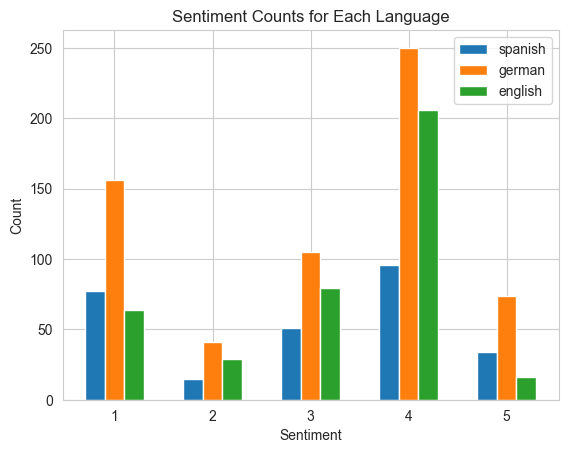

In [214]:
# Calculate the count of each sentiment category for each DataFrame
es_sentiment_counts = df_es['sentiment2'].value_counts().sort_index()
de_sentiment_counts = df_de['sentiment2'].value_counts().sort_index()
en_sentiment_counts = df_en['sentiment2'].value_counts().sort_index()

# Set the x-axis labels
sentiment_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(sentiment_labels))

# Set the width of each bar
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the counts for each sentiment category for each DataFrame
ax.bar(x - bar_width, es_sentiment_counts, width=bar_width, label='spanish')
ax.bar(x, de_sentiment_counts, width=bar_width, label='german')
ax.bar(x + bar_width, en_sentiment_counts, width=bar_width, label='english')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)

# Set the plot title and labels
ax.set_title('Sentiment Counts for Each Language')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [215]:
df_combined = pd.concat([df_es, df_en, df_de])
df_combined

,data,player,language,publishedAt,sentiment,short,sentiment2
0,adeyemi firmo el que es su primer gol en lo qu...,exequiel palacios,es,2023-01-29T18:25:03Z,1,\n con florian wirtz dejando su lesion definit...,2
1,la ultima semana de marzo es la primera ventan...,exequiel palacios,es,2023-01-30T16:52:46Z,2,,4
2,gustavo puerta ya no jugara en el bayer leverk...,exequiel palacios,es,2023-01-31T20:41:38Z,1,"el club aleman, que siempre se ha caracterizad...",3
3,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-09T18:32:38Z,5,"\n el presidente de la afa, claudio \'chiqui\'...",4
4,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-12T21:13:55Z,2,\n tambien participaron los otros campeones de...,4
...,...,...,...,...,...,...,...
621,bayer leverkusen wehrt sich in der europa leag...,piero hincapie,de,2023-05-12T10:02:12Z,2,"sekunden waren gespielt, als robert andrich na...",1
622,xabi alonso hat im taktik-duell mit seinem alt...,piero hincapie,de,2023-05-11T21:17:00Z,4,"sekunden waren gespielt, als robert andrich na...",1
623,trotz der pleite im halbfinal-hinspiel bei der...,piero hincapie,de,2023-05-11T21:09:16Z,3,"sekunden waren gespielt, als robert andrich na...",1
624,nach dem hitzigen aufeinandertreffen im stadio...,piero hincapie,de,2023-05-11T20:58:58Z,4,"sekunden waren gespielt, als robert andrich na...",1


In [216]:
# Create the folder if it doesn't exist
folder_name = 'data'

# Define the file path for saving the CSV
file_name = 'data_sentiment.csv'
file_path = os.path.join(folder_name, file_name)

# Convert the dataframe to CSV and save it
df_combined.to_csv(file_path, index=False)